# Analyzing 911 Calls

**Note:** The dataset used is a [911 Calls Dataset](https://www.kaggle.com/mchirico/montcoalert) from Kaggle.

I will be displaying my questions, solutions, visualizations, and observations of the data.

***
**Spotlight:**
- Data Analysis with Pandas / Numpy
- Data Visualization with Matplotlib
- Data Visualization with Seaborn
***

By Tashaun Nacci

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [35]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK


**What are the top 5 zipcodes for 911 calls?**

In [7]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships for 911 calls?**

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**How many unique title codes are there?**

In [11]:
df['title'].nunique()

110

**Creating a new column called 'Department' which will hold the department name for the 911 call from the title column (e.g. EMS). Then making a new column called 'Reason' which will hold the reason for the 911 call from the title column (e.g. BACK PAINS/INJURY)**

In [33]:
x = df['title'].iloc[2]
print(x.split(': ')[0])
print(x.split(': ')[1])

# Splitting the title column and grabbing the first index to get the 'Reason'

Fire
GAS-ODOR/LEAK


In [42]:
df['Reason'] = df['title'].apply(lambda title: title.split(': ')[1])
df['Department'] = df['title'].apply(lambda title: title.split(': ')[0])

In [43]:
df.head(1)
# Shows the new columns 'Reason' and 'Department'

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Department
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS


**What is the most common Department called for a 911 emergency?**

In [44]:
df['Department'].value_counts()
# EMS

EMS        48877
Traffic    35695
Fire       14920
Name: Department, dtype: int64

**Creating a countplot of 911 calls by Department**

<AxesSubplot:xlabel='Department', ylabel='count'>

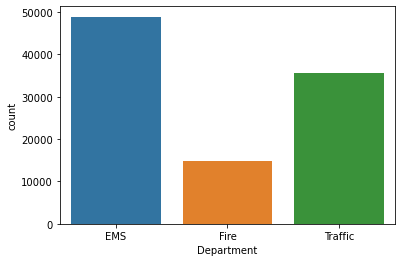

In [55]:
sns.countplot(x = 'Department', data = df)

**Converting the 'timeStamp' (string value) column into DateTime objects**

In [51]:
type(df['timeStamp'].iloc[0])

str

In [62]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
print(df['timeStamp'].iloc[0])

2015-12-10 17:40:00


In [61]:
time = df['timeStamp'].iloc[0]
print(df['timeStamp'].iloc[0])
print(time.hour)
print(time.day)

2015-12-10 17:40:00
17
10


In [71]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [72]:
df.head(1)
# Shows the new columns (Hour, Month, Day of Week)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Department,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,3


**Changing the 'Day of Week' column to the actual string values for the days (e.g. Mon, Tues, Wed, etc.)**

In [73]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [74]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Department,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,Thu


**Creating a countplot of the 'Day of Week' column with the hue based off of the 'Department' column**

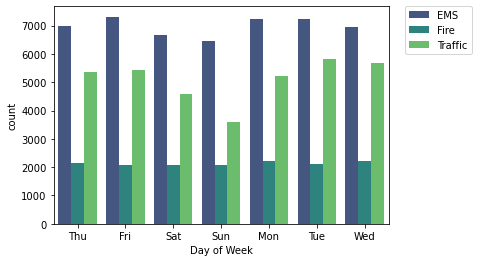

In [77]:
sns.countplot(x = 'Day of Week', data = df, hue = 'Department', palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.) # relocates legend
# A little less fire emergencies occur on sunday
# Almost evenly distributed data for each day

**Creating a similar plot as above, but using the months instead of days of the week**

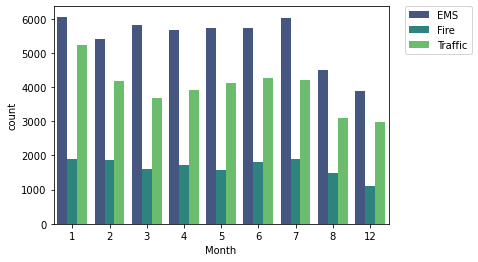

In [79]:
sns.countplot(data = df, x = 'Month', hue = 'Department', palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

**In the above plot, the months of September, October, and November are missing so I am going to try to plot the information in another way to fill in the missing months**

In [110]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Department,Hour,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

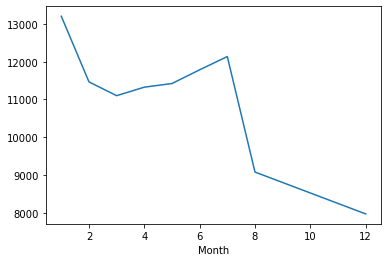

In [108]:
byMonth['lat'].plot()
# The trend of the months can be shown here even if the data is not present in the dataframe

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


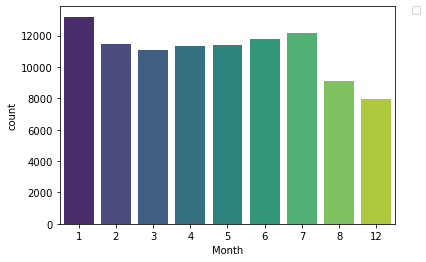

In [107]:
sns.countplot(data = df, x = 'Month', palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

# drop off in the data

In [103]:
byMonth.reset_index()
# resets the index to numerical values and makes month a column

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Department,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


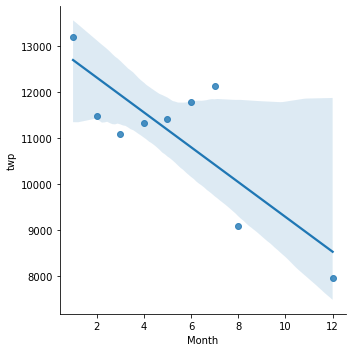

In [139]:
sns.lmplot(data = byMonth.reset_index(), x = 'Month', y = 'twp')
# Shows a trendline of how the number of incidents decline as it reaches later months
# This fills in for missing data

****

**Creating a new column called 'Date' that contains the date from the timeStamp column.**

In [140]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())
df.head()
# The new date column is visible

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Department,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,17,12,Thu,2015-12-10


**Grouping the date column with the count() aggregate and creating plots from it**

In [141]:
df.groupby('Date').count().head()
# instances per date

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Department,Hour,Month,Day of Week
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447


In [142]:
df.groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Department,Hour,Month,Day of Week
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389,389


<AxesSubplot:xlabel='Date'>

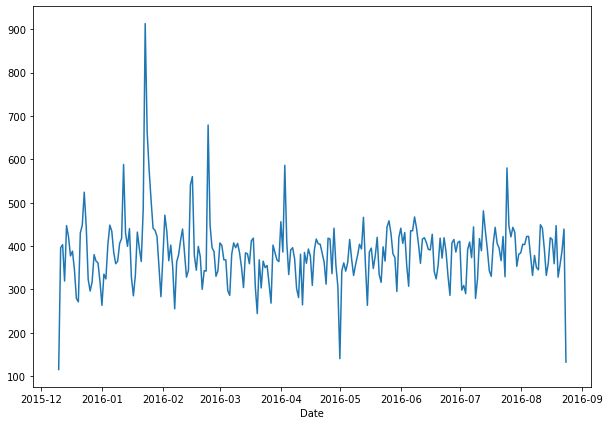

In [143]:
plt.figure(figsize=(10,7))
df.groupby('Date').count()['lat'].plot()

Text(0.5, 1.0, 'Fire')

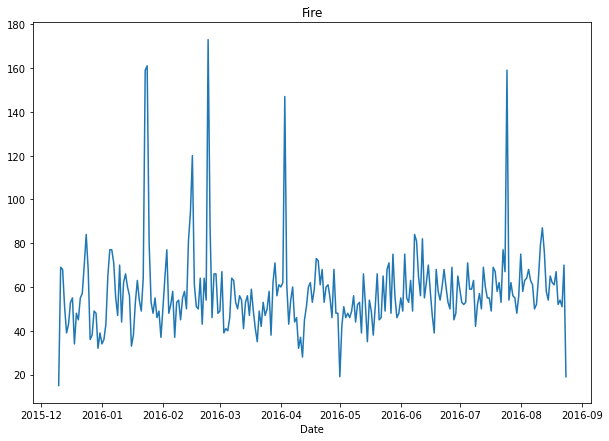

In [144]:
plt.figure(figsize=(10,7))
df[df['Department'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')

# Visualizing the amount of fire department 911 calls per date 

**I will restructure the data in order to create heatmaps. I will be making the columns the hours of the day and making the index the days of the week**

In [145]:
dayHour = df.groupby(by = ['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour.head()

# df.groupby(by = ['Day of Week', 'Hour']).count()['Reason'] makes a multi level index
# .unstack() unstacks the multilevel index and makes one the column, and the other the index

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

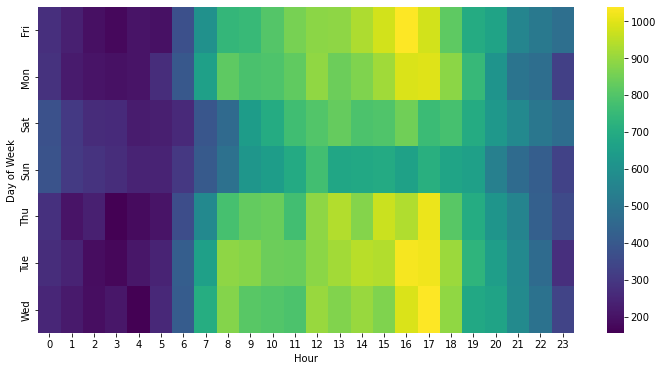

In [146]:
plt.figure(figsize = (12,6))
sns.heatmap(dayHour, cmap = 'viridis')

# Less incidents happen between 1-4 AM and the most incidents occur around 4-5 PM

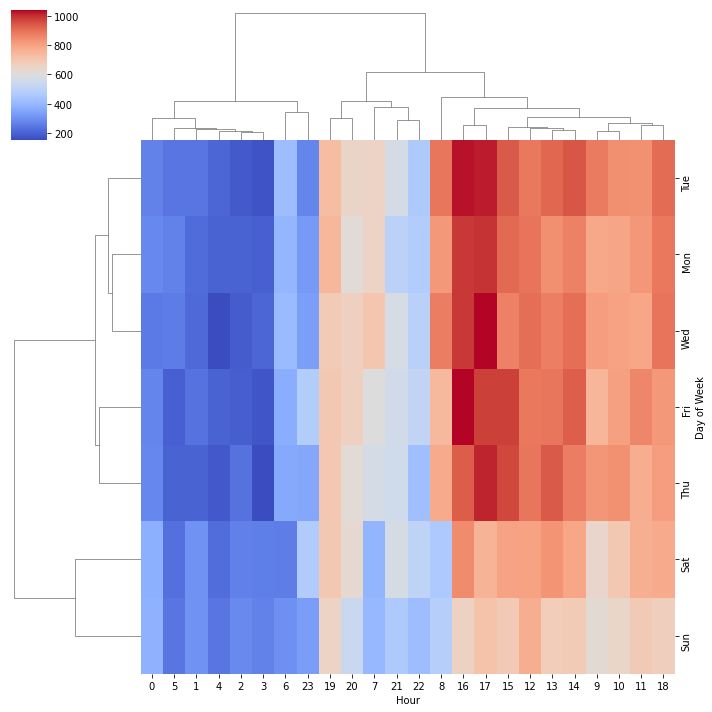

In [147]:
sns.clustermap(dayHour, cmap = 'coolwarm')
# Shows grouping of common times per days of week
# Observation: The amount of incidents that occurs at 12:00AM and 5:00AM on sunday is similar to the amount that occurs on saturday at those same times

**I will be repeating the same procedure as above, but will be making the months as the columns in the dataframe.**

In [148]:
dayMonth = df.groupby(by = ['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

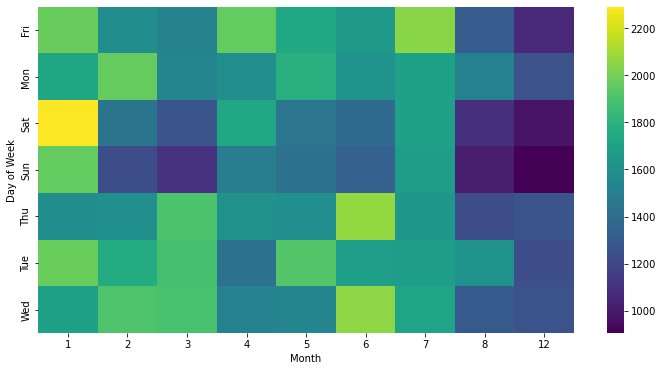

In [149]:
plt.figure(figsize = (12,6))
sns.heatmap(dayMonth, cmap = 'viridis')

# Observation: Little incidents occur in August and December on weekends
# Observation: A lot of incidents occur on saturdays in January

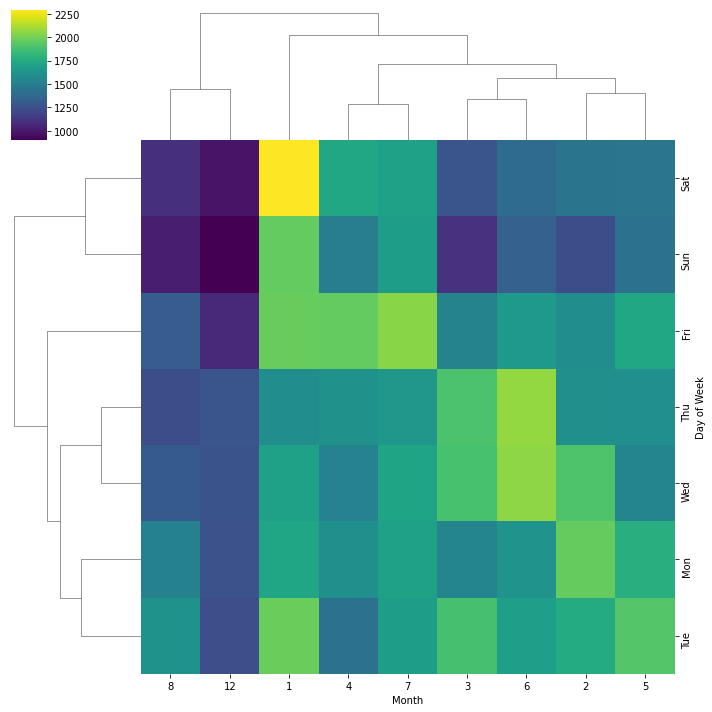

In [150]:
sns.clustermap(dayMonth, cmap = 'viridis')
# Observation: The amount of incidents that occur on Fridays in the months of January and April are very similar